In [ ]:
%%html
# figure out how to hide this cell
<style>
    .gray {
        background-color: #dfe0e8;
    }
</style>

## Wrangling the Billboard Top 100

<div class="gray">
Consider the data in billboard.csv (../data/billboard.csv) containing every song to appear on the weekly Billboard Top 100 (https://www.billboard.com/charts/hot-100/) chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:
    
- performer: who performed the song
- song: the title of the song
- year: year (1958 to 2021)
- week: chart week of that year (1, 2, etc)
- week_position: what position that song occupied that week on the Billboard top 100 chart.
  
Use your skills in data wrangling and plotting to answer the following three questions.

<strong>Part A:</strong> Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks
that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular
songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer , song , and count , where count represents the
number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending
order of the count variable, so that the more popular songs appear at the top of the table. Give your table a
short caption describing what is shown in the table.

(Note: you’ll want to use both performer and song in any group_by operations, to account for the fact that
multiple unique songs can share the same title.)
</div>

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/billboard.csv')
df2 = df[['performer', 'song', 'year', 'week', 'week_position']].copy()
df2.groupby(['performer', 'song'])['week'].count()\
    .reset_index()\
    .rename(columns = {'week':'count'})\
    .sort_values(by = 'count', ascending = False)\
    .head(10)

,performer,song,count
11194,Imagine Dragons,Radioactive,87
403,AWOLNATION,Sail,79
27121,The Weeknd,Blinding Lights,76
12026,Jason Mraz,I'm Yours,76
15008,LeAnn Rimes,How Do I Live,69
18752,OneRepublic,Counting Stars,68
14807,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
12421,Jewel,Foolish Games/You Were Meant For Me,65
506,Adele,Rolling In The Deep,65
4347,Carrie Underwood,Before He Cheats,64


The table above displays the performer, song title, and count that represents the number of weeks the song appeared in the Billboard Top 100 since 1958 up to the 22nd week in 2021.

Radioactive is the most popular song since 1958 since it appeared in the Billboard Top 100 87 times between 1958 and partially through 2021, but the other songs give it a run for its money with Sail coming in with 79 weeks in the Billboard Top 100.

<div class="gray">
    
<strong>Part B:</strong> Is the “musical diversity” of the Billboard Top 100 changing over time? Let’s find out. We’ll measure the
musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year.
Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year,
while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100
chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021,
since we do not have complete data on either of those years. Give the figure an informative caption in which you
explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of
data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given
song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of
steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how
many times it had appeared.

</div>

Text(0, 0.5, 'unique songs')

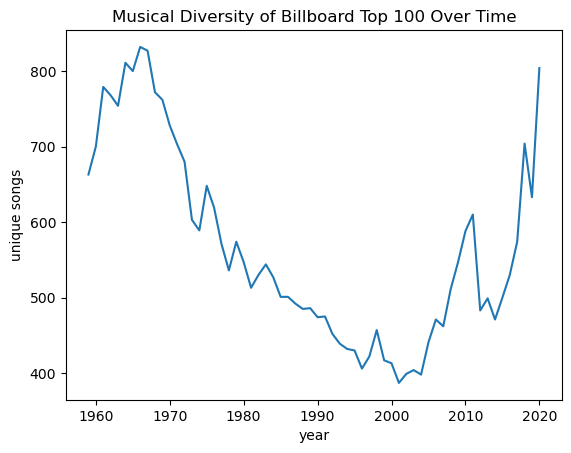

In [3]:
df2 = df.copy()

# Number of unique songs in the Top 100 each year
df2['performer and song'] = df2['performer'] + df2['song']
yearly_top_nunique = df2.groupby('year')['performer and song']\
    .nunique()\
    .reset_index()\
    .rename(columns = {'performer and song':'top_nunique'})

# Remove 1958 and 2021
mask = (yearly_top_nunique['year'] != 1958) & (yearly_top_nunique['year'] != 2021)
yearly_top_nunique = yearly_top_nunique[mask]

# plot
sns.lineplot(x = yearly_top_nunique['year'], y = yearly_top_nunique['top_nunique'])
plt.title('Musical Diversity of Billboard Top 100 Over Time')
plt.ylabel('unique songs')
# display(yearly_top_nunique)

The plot above displays the musical diversity of the Billboard Top 100 from 1959 to 2021. The musical divserity is defined as the number of unique songs that appeared on the Billboard Top 100 throughout the year. Interestingly, the musical diversity appears to generally decrease from around 1965 to 2000, and then it generally increases again towards 2020. It would be interesting to know what was leading to this increasing uniformity and now the increasing diversity, but I can't speculate on this without outside information.

<div class="gray">
<strong>Part C:</strong> Let’s define a “ten-week hit” as a single song that appeared on the Billboard Top 100 for at least ten
weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were “ten-week hits.” Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical
career. Give the plot an informative caption in which you explain what is shown.

Notes:
1. You might find this easier to accomplish in two distinct sets of data wrangling steps.
2. Make sure that the individuals names of the artists are readable in your plot, and that they’re not all jumbled
together. If you find that your plot isn’t readable with vertical bars, you can add a coord_flip() layer to
your plot to make the bars (and labels) run horizontally instead.
3. By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you’d like
to order them according to some other variable, you can use the fct_reorder function, described in this
blog post (https://datavizpyr.com/re-ordering-bars-in-barplot-in-r/). This is optional.
</div>

Text(0.5, 0, 'Number of 10-Week Hits')

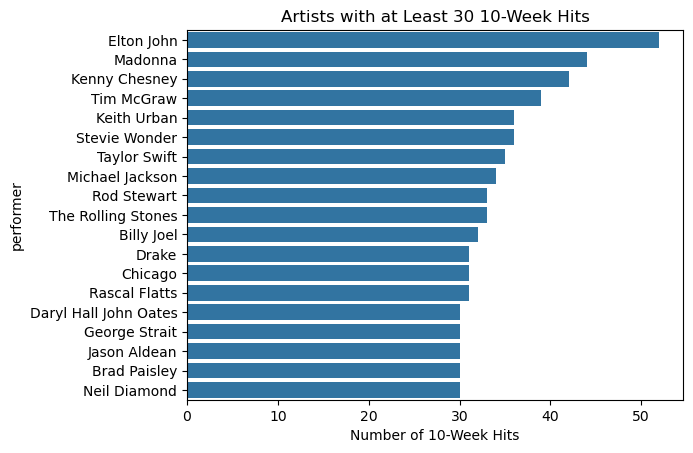

In [4]:
# second way (get 19 both ways)
# weeks_on_chart is a conseuctive measure. Want total weeks on chart instead
total_weeks_on_chart = df2.groupby(['performer', 'song']).size().reset_index().rename(columns = {0:'total_weeks_on_chart'})
# keep songs that were on chart for at least 10 weeks
ten_week_hits = total_weeks_on_chart[total_weeks_on_chart['total_weeks_on_chart']>=10]
ten_week_hits
# Get number of ten week hits for each performer
performer_ten_week_hits = ten_week_hits.groupby('performer').size()
performer_30_ten_week_hits = performer_ten_week_hits[performer_ten_week_hits >= 30]\
    .sort_values(ascending = False)\
    .reset_index()\
    .rename(columns = {0: 'n_ten_week_hits'})
# plot
sns.barplot(x = performer_30_ten_week_hits['n_ten_week_hits'], y = performer_30_ten_week_hits['performer'])
plt.title('Artists with at Least 30 10-Week Hits')
plt.xlabel('Number of 10-Week Hits')

The plot above displays artists with at least 30 10-weeks hits and their number of 10-week hits. A song is defined as a 10-week hit when it has appeared on the Billboard Top 100 at least 10 times. Elton John has had the most 10-week hits out of all artists since 1958, coming in at a little over 50 10-week hits. Madonna has the second most 10-week hits and so on down the graph.